Install our package, then import it.

_this is here as an example, and for development, eventually this install step shouldn't be in the notebooks, only in the main readme_

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import warnings

In [2]:
%%bash
cd .. 
pip install . --upgrade

Processing /home/smb/Documents/code/detect_simpsons_paradox_dev
  Running setup.py bdist_wheel for detect-simpsons-paradox: started
  Running setup.py bdist_wheel for detect-simpsons-paradox: finished with status 'done'
  Stored in directory: /tmp/pip-ephem-wheel-cache-58ou_30i/wheels/6f/33/e5/2e2b04658a9facaec056625f497ea9c4a21448cb987ce85d62
Successfully built detect-simpsons-paradox
  Found existing installation: detect-simpsons-paradox 0.2
    Uninstalling detect-simpsons-paradox-0.2:
      Successfully uninstalled detect-simpsons-paradox-0.2


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import wiggum as wg
import fairsim as sp_dat 
#warnings.simplefilter(action='ignore', category=FutureWarning)

# Dataset Generation

In [15]:
# Use geometric construction of SP from GMM

r_clusters = -.6  # correlation coefficient of clusters
cluster_spread = .8 # pearson correlation of means
p_sp_clusters = .9 # portion of clusters with SP 
k = 5 # number of clusters
cluster_size = [2,3]
domain_range = [0, 20, 0, 20]
N = 200 # number of points
p_clusters = [1.0/k]*k

sp_df2 = sp_dat.geometric_indep_views_gmm_sp(4,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                domain_range,k,N,p_clusters)
#mixed_regression_sp(N,mu,cov,[.7,.3])

200
8


Now we can view the first few rows of the data

In [16]:
sp_df2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,A,B,C,D
0,6.854021,1.662461,9.424238,5.137710,11.729296,14.101510,14.614970,17.017217,A4,B2,C1,D4
1,5.900391,3.151541,8.579166,11.098039,11.512200,15.060340,11.146952,10.051628,A4,B3,C1,D0
2,5.525200,2.377125,6.532839,7.788819,12.321604,16.062441,8.010334,9.010067,A4,B1,C1,D1
3,8.912242,13.254805,8.769415,10.138064,7.684815,9.513845,18.526070,16.550021,A3,B3,C4,D2
4,14.711440,12.638369,6.682043,7.486977,6.632522,9.168513,13.893789,17.166645,A1,B1,C4,D4


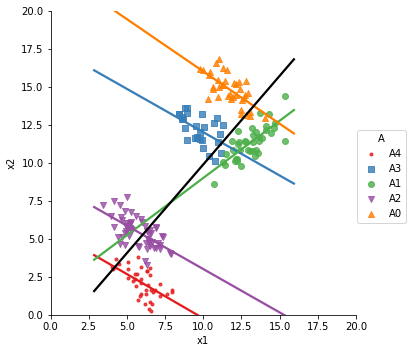

In [18]:
sp_dat.sp_plot(sp_df2, 'x1', 'x2', 'A',ci = None,domain_range=[0, 20, 0 , 20],ax=None)
    

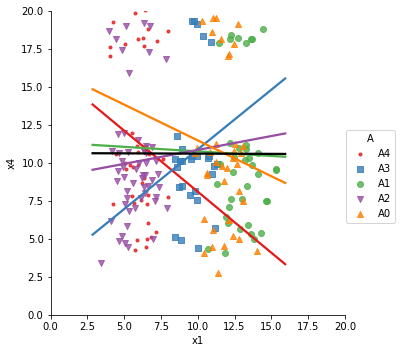

In [21]:
sp_dat.sp_plot(sp_df2, 'x1', 'x4', 'A',ci = None,domain_range=[0, 20, 0 , 20],ax=None)
    

We can look at the trends as is

In [22]:
result_df = wg.get_subgroup_trends_1lev(sp_df2,['pearson_corr'])

Mor interestingly, we can add columns for the clusters in 2 dimensional views and then compute trends again

In [23]:
sp_df2_clust = wg.add_all_dpgmm(sp_df2,2)
# sp_df2_clust = wg.add_quantile(sp_df2_clust,['x1','x2'],.1)
sp_df2_clust.head()

/home/smb/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


,x1,x2,x3,x4,x5,x6,x7,x8,A,B,...,x4_x5_dpgmm,x4_x6_dpgmm,x4_x7_dpgmm,x4_x8_dpgmm,x5_x6_dpgmm,x5_x7_dpgmm,x5_x8_dpgmm,x6_x7_dpgmm,x6_x8_dpgmm,x7_x8_dpgmm
0,6.854021,1.662461,9.424238,5.137710,11.729296,14.101510,14.614970,17.017217,A4,B2,...,1,3,3,4,2,2,11,3,0,17
1,5.900391,3.151541,8.579166,11.098039,11.512200,15.060340,11.146952,10.051628,A4,B3,...,1,0,4,5,2,3,2,6,1,0
2,5.525200,2.377125,6.532839,7.788819,12.321604,16.062441,8.010334,9.010067,A4,B1,...,1,0,4,5,2,3,2,6,1,0
3,8.912242,13.254805,8.769415,10.138064,7.684815,9.513845,18.526070,16.550021,A3,B3,...,1,1,7,2,5,0,11,8,0,15
4,14.711440,12.638369,6.682043,7.486977,6.632522,9.168513,13.893789,17.166645,A1,B1,...,1,3,3,2,5,2,11,4,0,17


In [24]:
result_df_clust = wg.get_subgroup_trends_1lev(sp_df2_clust,['pearson_corr'])
result_df_clust.sample(10)

,feat1,feat2,subgroup_trend,group_feat,subgroup,trend_type,agg_trend
3772,x6,x8,0.068093,x6_x7_dpgmm,5,pearson_corr,0.072905
718,x1,x7,0.287585,D,D3,pearson_corr,0.010931
1075,x2,x3,-0.111813,x3_x8_dpgmm,1,pearson_corr,-0.049395
105,x1,x2,0.765304,x4_x7_dpgmm,3,pearson_corr,0.789670
822,x1,x7,0.062552,x5_x7_dpgmm,3,pearson_corr,0.010931
3643,x6,x8,0.173862,A,A3,pearson_corr,0.072905
2856,x4,x7,-0.067553,x2_x4_dpgmm,7,pearson_corr,-0.065261
1821,x3,x4,0.835719,A,A1,pearson_corr,0.820205
749,x1,x7,0.201802,x2_x3_dpgmm,3,pearson_corr,0.010931
2145,x3,x6,0.513205,x1_x8_dpgmm,2,pearson_corr,0.094988


Now, we can work toward ranking, by adding the slope columns

In [25]:
result_df_clust = wg.add_slope_cols(sp_df2_clust,result_df_clust)
result_df_clust = wg.add_angle_col(result_df_clust)
result_df_clust.head()

,feat1,feat2,subgroup_trend,group_feat,subgroup,trend_type,agg_trend,subgroup_slope,all_slope,angle
0,x1,x2,-0.681933,A,A0,pearson_corr,0.78967,-0.687708,1.165499,83.886953
1,x1,x2,0.753717,A,A1,pearson_corr,0.78967,0.752709,1.165499,12.401263
2,x1,x2,-0.619429,A,A2,pearson_corr,0.78967,-0.570650,1.165499,79.081596
3,x1,x2,-0.543724,A,A3,pearson_corr,0.78967,-0.569665,1.165499,79.039006
4,x1,x2,-0.600228,A,A4,pearson_corr,0.78967,-0.582130,1.165499,79.575335


In [26]:
result_df_clust.sort_values(by='angle',ascending=False).head(10)

,feat1,feat2,subgroup_trend,group_feat,subgroup,trend_type,agg_trend,subgroup_slope,all_slope,angle
31,x1,x2,-0.241001,x1_x4_dpgmm,11,pearson_corr,0.78967,-1.534232,1.165499,106.274373
71,x1,x2,-0.426219,x2_x7_dpgmm,10,pearson_corr,0.78967,-1.024497,1.165499,95.063612
65,x1,x2,-0.506199,x2_x6_dpgmm,4,pearson_corr,0.78967,-0.896703,1.165499,91.253016
75,x1,x2,-0.511587,x2_x8_dpgmm,10,pearson_corr,0.78967,-0.896488,1.165499,91.246209
46,x1,x2,-0.511587,x1_x8_dpgmm,9,pearson_corr,0.78967,-0.896488,1.165499,91.246209
41,x1,x2,-0.556338,x1_x7_dpgmm,4,pearson_corr,0.78967,-0.881715,1.165499,90.773477
70,x1,x2,-0.541816,x2_x7_dpgmm,7,pearson_corr,0.78967,-0.877217,1.165499,90.628143
53,x1,x2,-0.412662,x2_x4_dpgmm,1,pearson_corr,0.78967,-0.844946,1.165499,89.566377
49,x1,x2,-0.396308,x2_x3_dpgmm,3,pearson_corr,0.78967,-0.828170,1.165499,89.000889
21,x1,x2,-0.405062,x1_x2_dpgmm,5,pearson_corr,0.78967,-0.756850,1.165499,86.490601


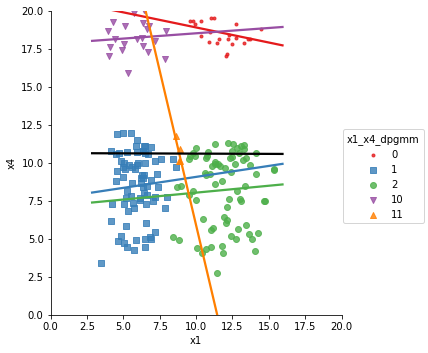

In [27]:
sp_dat.sp_plot(sp_df2, 'x1', 'x4', 'x1_x4_dpgmm',ci = None,domain_range=[0, 20, 0 , 20],ax=None)
    

In [12]:
count_df = wg.count_sp_views(result_df_clust, colored= False, portions =False,data_df= None,
                    groupby_count =False,append_counts=True)
# result_df_clust = wg.add_view_count(result_df_clust,count_df)

NameError: name 'result_df' is not defined

In [ ]:
result_df_clust.head()

In [ ]:
gb = sp_df2.groupby('A')
len(gb)

In [1]:
tui = np.triu_indices(2,k=1)
tui

NameError: name 'np' is not defined

# TODO Visualization (Hard code modify)

In [ ]:
# group by color
grouped_df_color = latent_df.groupby('color')['x1','x2','x3'].corr()
blue=grouped_df_color.loc['b']
red=grouped_df_color.loc['r']

# group by char
grouped_df_char = latent_df.groupby('char')['x1','x2','x3'].corr()
char_o=grouped_df_char.loc['o']
char_x=grouped_df_char.loc['x']

# create a 0 matrix for the irrelvant cells
s = (len(blue),len(blue))
zero = np.zeros(s)

# manipulate the subgroup matrix first after corr() method
color_group=np.vstack([np.hstack([blue, zero]), np.hstack([zero, red])])

# create a 0 matrix for the irrelvant cells
s = (len(all_corr),len(color_group))
zero1 = np.zeros(s)

# combine the correlation matrix of all of the data with subgroup by color
all_combined=np.vstack([np.hstack([all_corr, zero1]), np.hstack([zero1.transpose(), color_group])])

# Combine char group
s = (len(char_o),len(char_x))
zero = np.zeros(s)
char_group=np.vstack([np.hstack([char_o, zero]), np.hstack([zero, char_x])])
s = (len(all_combined),len(char_group))
zero1 = np.zeros(s)
all_combined=np.vstack([np.hstack([all_combined, zero1]), np.hstack([zero1.transpose(), char_group])])

__ why a heat map?__ 

In [ ]:
# Generate a heatmap for correlation matrix
cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', ['red', 'white', 'blue'])
norm = plt.Normalize(-1,1)

labels =  ['x1','x2','x3','x1_b','x2_b','x3_b','x1_r','x2_r','x3_r','x1_o','x2_o','x3_o','x1_x','x2_x','x3_x']
plt.figure(figsize=(11, 9))

ax = sns.heatmap(all_combined, cmap=cmap, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels, linewidths=.5, norm=norm, center=0)

# Offset 0.00
for t in ax.texts: 
    if t.get_text() == '0.00':
        t.set_text("")
plt.show()